In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels import PanelOLS


### Exercise 1.1

In [2]:
df = pd.read_stata('assignment8.dta')

df.head()
df[['state','wage_st', 'time']].describe(include='all')

,state,wage_st,time
count,820.000000,779.000000,820.000000
mean,0.807317,4.805712,0.500000
std,0.394647,0.358395,0.500305
min,0.000000,4.250000,0.000000
25%,1.000000,4.500000,0.000000
50%,1.000000,5.000000,0.500000
75%,1.000000,5.050000,1.000000
max,1.000000,6.250000,1.000000


In [3]:
state_map = {1:"NJ", 0:"PA"}
df['state_name'] = df['state'].map(state_map)

df['state_name'].value_counts()

state_name
NJ    662
PA    158
Name: count, dtype: int64

In [66]:
bin_edges = np.arange(4.20, 5.60 + 0.10, 0.10)

bin_labels = np.arange(4.25, 5.55 + 0.10, 0.10).round(2)

In [67]:
df_nonmissing = df.dropna(subset=['wage_st']).copy() #copy to not delete data

df_nonmissing['wage_bin'] = pd.cut(
    df_nonmissing['wage_st'],
    bins=bin_edges, labels= bin_labels, right=False) #include left edge, exclude right edge

df_nonmissing['wage_bin'].value_counts().sort_index()

wage_bin
4.25    147
4.35     18
4.45      5
4.55     78
4.65     19
4.75     62
4.85     14
4.95      5
5.05    370
5.15      9
5.25     24
5.35      3
5.45      2
5.55     17
Name: count, dtype: int64

In [68]:
counts = (df_nonmissing.groupby(['time', 'state_name', 'wage_bin'])
          .size().rename('n').reset_index())

counts.head()

total = (counts.groupby(['time', 'state_name'])['n'].transform('sum'))
counts['pct'] = counts['n'] / total * 100

counts_feb = counts[counts['time'] == 0]
counts_nov = counts[counts['time'] == 1]    

counts_feb.head()



C:\Users\majoa\AppData\Local\Temp\ipykernel_31388\3655497666.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (df_nonmissing.groupby(['time', 'state_name', 'wage_bin'])


,time,state_name,wage_bin,n,pct
0,0.0,NJ,4.25,101,32.371795
1,0.0,NJ,4.35,12,3.846154
2,0.0,NJ,4.45,3,0.961538
3,0.0,NJ,4.55,54,17.307692
4,0.0,NJ,4.65,18,5.769231


In [69]:
table_feb = counts_feb.pivot(index='wage_bin', columns='state_name', values='pct'
                             ).reindex(bin_labels)

table_nov = counts_nov.pivot(index='wage_bin', columns='state_name', values='pct'
                             ).reindex(bin_labels)


In [64]:
# Look at wages around 5 dollars in Feb (time=0) for PA
mask = (df['time'] == 0) & (df['state'] == 0)  # PA, February
df.loc[mask, 'wage_st'].value_counts().sort_index().tail(15)


wage_st
4.25    26
4.35     1
4.50    13
4.67     1
4.75    10
4.87     1
5.00    20
5.25     2
5.50     2
Name: count, dtype: int64

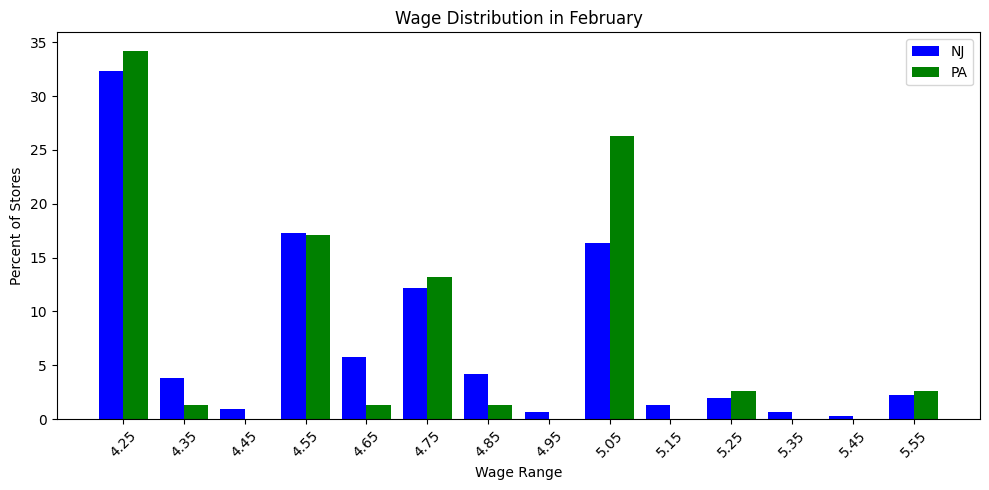

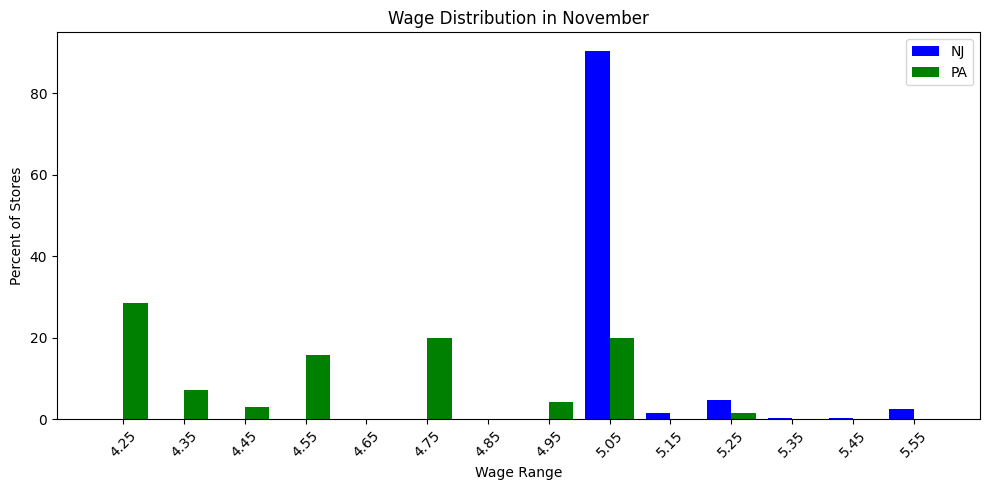

In [71]:
#let's plot

def plot_wage_distribution(table, title):
    x = np.arange(len(table.index))
    width = 0.4

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(x - width/2, table['NJ'], width, label='NJ', color='blue')
    ax.bar(x + width/2, table['PA'], width, label='PA', color='green')

    ax.set_xticks(x)
    ax.set_xticklabels(table.index, rotation=45)
    ax.set_xlabel('Wage Range')
    ax.set_ylabel('Percent of Stores')
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_wage_distribution(table_feb, 'Wage Distribution in February')
plot_wage_distribution(table_nov, 'Wage Distribution in November')

### Exercise 1.2

In [4]:
df.describe(include='all')

,store,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,...,meals,open,hoursopen,pricesoda,pricefry,priceentree,nregisters,nregisters11,time,state_name
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,...,809.000000,809.000000,809.000000,790.000000,775.000000,784.000000,792.000000,781.000000,820.000000,820
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NJ
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662
mean,246.509750,2.117073,0.343902,0.807317,0.226829,0.153659,0.426829,0.087805,0.104878,0.085366,...,1.843016,8.075710,14.452102,1.044911,0.931471,1.337883,3.601010,2.688860,0.500000,NaN
std,148.143921,1.109819,0.475299,0.394647,0.419037,0.360841,0.494919,0.283184,0.306583,0.279596,...,0.543939,2.158387,2.780091,0.091059,0.107942,0.646135,1.249991,0.886793,0.500305,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,0.410000,0.670000,0.410000,1.000000,0.000000,0.000000,NaN
25%,119.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,6.500000,12.000000,1.000000,0.850000,0.940000,3.000000,2.000000,0.000000,NaN
50%,237.500000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,7.000000,15.000000,1.050000,0.940000,1.030000,3.000000,3.000000,0.500000,NaN
75%,372.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,10.500000,16.000000,1.090000,1.010000,1.842500,4.000000,3.000000,1.000000,NaN


In [5]:
df[[
'store', 'state','time', 'empft','emppt', 'nmgrs',
'pricesoda', 'pricefry','priceentree']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   store        820 non-null    float32
 1   state        820 non-null    float32
 2   time         820 non-null    float32
 3   empft        802 non-null    float32
 4   emppt        806 non-null    float32
 5   nmgrs        808 non-null    float32
 6   pricesoda    790 non-null    float32
 7   pricefry     775 non-null    float32
 8   priceentree  784 non-null    float32
dtypes: float32(9)
memory usage: 29.0 KB


In [5]:
#adding fte and meal price columns
df['fte'] = df['empft'] + 0.5 * df['emppt'] + df['nmgrs']

df['price_meal'] = df['pricefry'] + df['priceentree'] + df['pricesoda']

before = df[df['time'] == 0].dropna(subset=['wage_st']).copy()
after = df[df['time'] == 1].dropna(subset=['wage_st']).copy()

before = before.set_index('store')
after = after.set_index('store')

all_time = before[['state', 'fte', 'price_meal', 'chain', 'co_owned',
            'southj', 'centralj', 'northj', 'shore', 'pa1', 'pa2']].join(
       after[['fte', 'price_meal']], lsuffix='_before', rsuffix='_after', how='inner'
                   )

all_time.head()

,state,fte_before,price_meal_before,chain,co_owned,southj,centralj,northj,shore,pa1,pa2,fte_after,price_meal_after
store,,,,,,,,,,,,,
56.0,0.0,34.0,3.48,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,2.58
61.0,0.0,24.0,3.29,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,35.5,2.80
445.0,0.0,70.5,2.86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,2.84
451.0,0.0,23.5,2.85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.5,2.89
455.0,0.0,11.0,3.78,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,4.10


In [12]:


NJ_price_meal_before = all_time[(all_time['state'] == 1)]['price_meal_before'].mean()
NJ_price_meal_after = all_time[(all_time['state'] == 1)]['price_meal_after'].mean()
PA_price_meal_before = all_time[(all_time['state'] == 0)]['price_meal_before'].mean()
PA_price_meal_after = all_time[(all_time['state'] == 0)]['price_meal_after'].mean()


diff_pre_treamtent_meal = NJ_price_meal_before - PA_price_meal_before
diff_post_treatment_meal = NJ_price_meal_after - PA_price_meal_after

did_estimator_meal = diff_pre_treamtent_meal - diff_post_treatment_meal

NJ_fte_before = all_time[(all_time['state'] == 1)]['fte_before'].mean()
NJ_fte_after = all_time[(all_time['state'] == 1)]['fte_after'].mean()
PA_fte_before = all_time[(all_time['state'] == 0)]['fte_before'].mean()
PA_fte_after = all_time[(all_time['state'] == 0)]['fte_after'].mean()


diff_pre_treamtent_fte = NJ_fte_before - PA_fte_before
diff_post_treatment_fte = NJ_fte_after - PA_fte_after

did_estimator_fte = diff_pre_treamtent_fte - diff_post_treatment_fte
print(round(did_estimator_meal, 4))
print(round(did_estimator_fte, 4))


-0.1105
-2.3614


In [11]:
#For OLS

all_time['delta_price_meal'] = (all_time['price_meal_after'] - all_time['price_meal_before'])
all_time['delta_fte'] = (all_time['fte_after'] - all_time['fte_before'])

all_time['NJ'] = all_time['state']  # NJ=1, PA=0

chain_dummies = pd.get_dummies(all_time['chain'], prefix='chain', drop_first=True).astype(float)

X = pd.concat([all_time[['NJ', 'co_owned']], chain_dummies], axis=1)

X = sm.add_constant(X)

X.dtypes

const        float64
NJ           float32
co_owned     float32
chain_2.0    float64
chain_3.0    float64
chain_4.0    float64
dtype: object

In [9]:


y_Emp = all_time['delta_fte']
y_Price = all_time['delta_price_meal']

def run_model (y, model_name):
    model = sm.OLS(y, X, missing = 'drop')
    results = model.fit(cov_type = 'HC1')
    print(f"Results for change in {model_name}:")
    print(results.summary())


run_model(y_Emp, 'employment')


Results for change in employment:
                            OLS Regression Results                            
Dep. Variable:              delta_fte   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.649
Date:                Tue, 02 Dec 2025   Prob (F-statistic):              0.146
Time:                        17:36:13   Log-Likelihood:                -1255.2
No. Observations:                 351   AIC:                             2522.
Df Residuals:                     345   BIC:                             2546.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4

In [10]:

run_model(y_Price, 'meal price')


Results for change in meal price:
                            OLS Regression Results                            
Dep. Variable:       delta_price_meal   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.105
Date:                Tue, 02 Dec 2025   Prob (F-statistic):             0.0645
Time:                        17:36:22   Log-Likelihood:                -132.15
No. Observations:                 334   AIC:                             276.3
Df Residuals:                     328   BIC:                             299.2
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0